In [93]:
pip install --upgrade typing_extensions==4.1.0

  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.0.1
    Uninstalling typing_extensions-4.0.1:
      Successfully uninstalled typing_extensions-4.0.1
Note: you may need to restart the kernel to use updated packages.


In [89]:
pip install -U pip setuptools wheel

     ---------------------------------------- 1.1/1.1 MB 3.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 66.0.0
    Uninstalling setuptools-66.0.0:
      Successfully uninstalled setuptools-66.0.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


In [87]:
!pip install spacy

In [86]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 4.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [81]:
!python -m spacy download en

     ---------------------------------------- 12.8/12.8 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.4.1
    Uninstalling en-core-web-sm-3.4.1:
      Successfully uninstalled en-core-web-sm-3.4.1
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
pip install transformers

In [ ]:
pip install googletrans

In [ ]:
pip install nest_asyncio

In [ ]:
pip install inltk

In [ ]:
pip install google_play_scraper

In [2]:
import googletrans

In [3]:
import asyncio

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
"""
###
Name of the module                                  : app reviews collector and sentiment anlaysis                           
Date of module creation                             : 221228
Author of the module                                : Pradeep Tidke, Nagarjuna Jali
Modification history                                : 230130, Initial commit
Synopsis of the module about what the module does   :
        
### optional
Reference                                           : 
Different functions supported in the module along with their input output parameters :
Global variables accessed or modified by the module :
Example command                                     : 
Note                                                : Use colab only
"""


# Import
import pandas as pd
import os
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app

# constant variables
app_packages = [
    'com.tatamotors.evcvp',
    'com.tatamotors.pvcvp',
    'com.hyundai.india.bluelink.prd',
    'com.saicmotor.iov.india',
    'com.mahindra.adrenox',
    'com.msil.suzukiconnect_generation_2'
]

org_names = ['TATA EV', 'TATA PV', 'Hyundai',
             'Accessory Suzuki Connect', 'MG', 'Mahindra', 'Suzuki Connect']

if __name__ == "__main__":

    """ Get app info """

    app_infos = []

    for ap in tqdm(app_packages):
        info = app(ap, lang='en', country='us')
        del info['comments']
        app_infos.append(info)

    app_infos_df = pd.DataFrame(app_infos)
    app_infos_df.to_csv('apps.csv', index=None, header=True)

    """Get reviews"""

    app_reviews = []

    for ap in tqdm(app_packages):
        for score in list(range(1, 6)):
            for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
                rvs, _ = reviews(
                    ap,
                    lang='en',
                    country='us',
                    sort=sort_order,
                    count=5000,  # if score == 3 else 100,
                    filter_score_with=score
                )
                for r in rvs:
                    r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                    r['appId'] = ap
                app_reviews.extend(rvs)

    """ Saving csv ..."""

    print('saving csv...')

    outdir = os.path.join(os.path.abspath('.'), "out")
    outname = f'reviews.csv'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        print(f'INFO: {outdir} created.')

    fullname = os.path.join(outdir, outname)
    app_reviews_df = pd.DataFrame(app_reviews)
    app_reviews_df.to_csv(fullname, index=None, header=True)
    print(f'SUCCESS: csv saved to {fullname}')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from langdetect import detect
plt.style.use('ggplot')

In [107]:
# removal of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\34491\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [111]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\34491\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<>:16: DeprecationWarning: invalid escape sequence \w
<>:16: DeprecationWarning: invalid escape sequence \w
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2494972742.py:16: DeprecationWarning: invalid escape sequence \w
  car_data['content']=car_data['content'].str.replace('[^\w\s]', '')


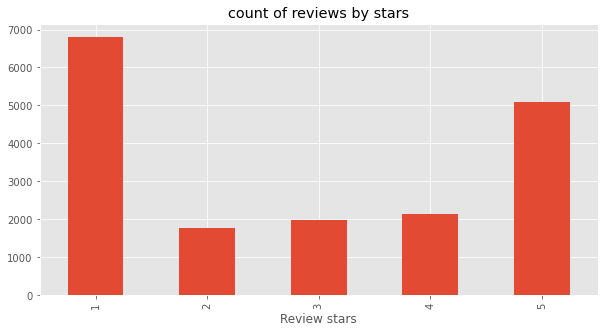

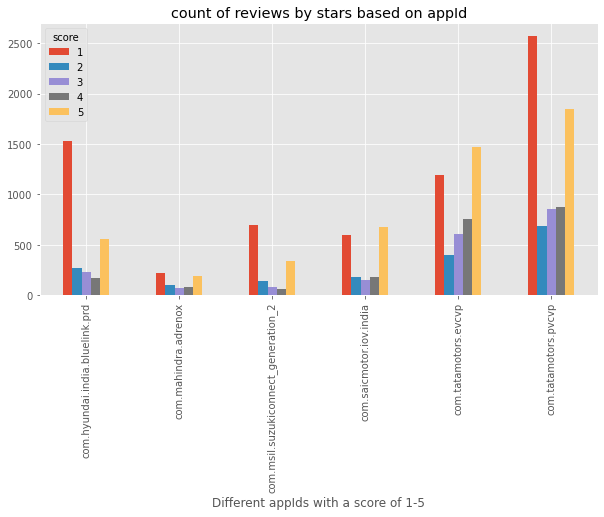

C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2494972742.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  car_data['content']=car_data['content'].str.replace('[^\w\s]', '')


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,language,Id
0,d53da38a-8521-4438-95fc-fb0e32ccc426,Manohar Kashyap,https://play-lh.googleusercontent.com/a-/AD5-W...,disfunctional precool function doesnt see poss...,1,0,1.33,2023-01-07 14:51:16,NaN,NaN,most_relevant,com.tatamotors.evcvp,unknown,0
1,ff6ecdfc-fe34-41b3-a4ca-1df22c54827a,Prasenjeet Pati,https://play-lh.googleusercontent.com/a-/AD5-W...,scary give command unsure worked worksthe next...,1,12,1.32,2022-11-29 14:11:13,"Dear Customer, We really appreciate you bringi...",2022-10-31 15:53:57,most_relevant,com.tatamotors.evcvp,unknown,1
2,6aae3711-0c46-4169-ab0d-9f61a0b38b84,Rajeevan Nair S,https://play-lh.googleusercontent.com/a-/AD5-W...,range application says cannot trusted could fa...,1,0,1.33,2023-01-04 09:25:30,"Dear Sir, Greetings to you from Tata Motors. Y...",2023-01-05 14:26:44,most_relevant,com.tatamotors.evcvp,unknown,2
3,3cc57fac-3a58-4a46-a758-669017ef88fe,Aditya Upadhyay,https://play-lh.googleusercontent.com/a-/AD5-W...,useless part doesnt show charging stations any...,1,0,1.33,2022-12-25 22:22:24,"Dear Sir, Greetings to you from Tata Motors. Y...",2022-12-26 12:02:18,most_relevant,com.tatamotors.evcvp,unknown,3
4,89d557f5-cdea-4808-b311-33fd7e7fcdea,Anand Rajagopalan,https://play-lh.googleusercontent.com/a/AEdFTp...,theyve fixed bug wish forum users critique req...,1,2,1.32,2022-10-18 11:00:03,"\nDear Sir, Greetings to you from Tata Motors....",2022-10-08 17:22:06,most_relevant,com.tatamotors.evcvp,unknown,4


In [109]:
# Reading the data
#car_data = pd.read_csv("C:/Users/34491/TML project NLP/out/reviews.csv")
def initial_read_analyze(csv_location):
    car_data = pd.read_csv(csv_location)
    overall_reviews = car_data['score'].value_counts().sort_index().plot(kind = 'bar', title ='count of reviews by stars', figsize=(10,5))
    overall_reviews.set_xlabel('Review stars')
    plt.show()
    diff_apps = car_data.groupby(['appId', 'score']).size().unstack(fill_value=0)
    all_appid = diff_apps.plot(kind = 'bar',title = 'count of reviews by stars based on appId',figsize=(10,5))
    all_appid.set_xlabel('Different appIds with a score of 1-5')
    plt.show()

def cleaning_text():
    car_data['content']=car_data['content'].apply(lambda x: " ".join(word.lower() for word in x.split()))
    #removal of punctuations
    car_data['content']=car_data['content'].str.replace('[^\w\s]', '')
    # custom stopwords
    stopwords_list = ['also','one','car', 'app', 'tata', 'motors','tata motors', 'nexon', 'tata nexon', 'ira', 'zconnect', 'tatamotors', 'car', 
                      'suzuki','suzuki connect', 'hyundai', 'bluelink','blue link', 'mg', 'feature', 'update', 'mahindra', 'xuv', 'xuv700', 'adrenox',
                      'https', 'hector', 'work', 'working', 'Show', 'showing', 'even', 'now', 'vehicle', 'use', 'need', 'good', 'features',
                      'option', 'day', 'will','still','please','ev','blue','link']
    stopwrds = nltk.corpus.stopwords.words('english')
    stopwrds.extend(stopwords_list)
    car_data['content']=car_data['content'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopwrds))
    return car_data.head()
    
def languages_detect():
    languages_langdetect=[]
    for lines in car_data['content']:
        try:
            result = langdetect.detect_langs(lines)
            result = str(result[0])[:2]
        except:
            result = 'unknown'
    
        finally:
            languages_langdetect.append(result)
            
    x=pd.Series(languages_langdetect)
    car_data['language'] = languages_langdetect
    return car_data.head()
    
    
initial_read_analyze("C:/Users/34491/TML project NLP/out/reviews.csv")
cleaning_text()
languages_detect()

#### NOTE: eventhough detect shows multiple languages the abouve are all languages in english only except for those mentioned
#### ml-malayalam, hi-hindi, mr= marathi, ta=tamil, te=telugu so totally altogether there are 80 cells with different languages
#### Which is very less so we can consider to remove them or just ignore them

### Task 1 : Sentiment Analysis Using Vader Approach
#### It is used for sentiment analysis of text which has both the polarities i.e. positive/negative. VADER is used to quantify how much of positive or negative emotion the text has and also the intensity of emotion

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\34491\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [113]:
# running the polarity scores on the entire dataset
def polarity_scores():
    res = {}
    for i, row in tqdm(car_data.iterrows(), total = len(car_data)):
        content = row['content']
        myid = row['reviewId']
        res[i] = sia.polarity_scores(content)
    vaders = pd.DataFrame(res).T
    vaders = vaders.reset_index().rename(columns= {'index':'Id'})
    vaders = vaders.merge(car_data, how='left')
    return vaders.head()


  0%|          | 0/17812 [00:00<?, ?it/s]

,Id,neg,neu,pos,compound,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,language
0,0,0.000,0.931,0.069,0.4404,d53da38a-8521-4438-95fc-fb0e32ccc426,Manohar Kashyap,https://play-lh.googleusercontent.com/a-/AD5-W...,disfunctional precool function doesnt see poss...,1,0,1.33,2023-01-07 14:51:16,NaN,NaN,most_relevant,com.tatamotors.evcvp,unknown
1,1,0.192,0.690,0.118,-0.6705,ff6ecdfc-fe34-41b3-a4ca-1df22c54827a,Prasenjeet Pati,https://play-lh.googleusercontent.com/a-/AD5-W...,scary give command unsure worked worksthe next...,1,12,1.32,2022-11-29 14:11:13,"Dear Customer, We really appreciate you bringi...",2022-10-31 15:53:57,most_relevant,com.tatamotors.evcvp,unknown
2,2,0.146,0.751,0.103,-0.1416,6aae3711-0c46-4169-ab0d-9f61a0b38b84,Rajeevan Nair S,https://play-lh.googleusercontent.com/a-/AD5-W...,range application says cannot trusted could fa...,1,0,1.33,2023-01-04 09:25:30,"Dear Sir, Greetings to you from Tata Motors. Y...",2023-01-05 14:26:44,most_relevant,com.tatamotors.evcvp,unknown
3,3,0.160,0.840,0.000,-0.8020,3cc57fac-3a58-4a46-a758-669017ef88fe,Aditya Upadhyay,https://play-lh.googleusercontent.com/a-/AD5-W...,useless part doesnt show charging stations any...,1,0,1.33,2022-12-25 22:22:24,"Dear Sir, Greetings to you from Tata Motors. Y...",2022-12-26 12:02:18,most_relevant,com.tatamotors.evcvp,unknown
4,4,0.046,0.886,0.068,0.2263,89d557f5-cdea-4808-b311-33fd7e7fcdea,Anand Rajagopalan,https://play-lh.googleusercontent.com/a/AEdFTp...,theyve fixed bug wish forum users critique req...,1,2,1.32,2022-10-18 11:00:03,"\nDear Sir, Greetings to you from Tata Motors....",2022-10-08 17:22:06,most_relevant,com.tatamotors.evcvp,unknown


In [38]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns= {'index':'Id'})
vaders = vaders.merge(car_data, how='left')

In [39]:
vaders.head()

,Id,neg,neu,pos,compound,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,language
0,0,0.000,0.931,0.069,0.4404,d53da38a-8521-4438-95fc-fb0e32ccc426,Manohar Kashyap,https://play-lh.googleusercontent.com/a-/AD5-W...,disfunctional precool function doesnt see poss...,1,0,1.33,2023-01-07 14:51:16,NaN,NaN,most_relevant,com.tatamotors.evcvp,unknown
1,1,0.192,0.690,0.118,-0.6705,ff6ecdfc-fe34-41b3-a4ca-1df22c54827a,Prasenjeet Pati,https://play-lh.googleusercontent.com/a-/AD5-W...,scary give command unsure worked worksthe next...,1,12,1.32,2022-11-29 14:11:13,"Dear Customer, We really appreciate you bringi...",2022-10-31 15:53:57,most_relevant,com.tatamotors.evcvp,unknown
2,2,0.146,0.751,0.103,-0.1416,6aae3711-0c46-4169-ab0d-9f61a0b38b84,Rajeevan Nair S,https://play-lh.googleusercontent.com/a-/AD5-W...,range application says cannot trusted could fa...,1,0,1.33,2023-01-04 09:25:30,"Dear Sir, Greetings to you from Tata Motors. Y...",2023-01-05 14:26:44,most_relevant,com.tatamotors.evcvp,unknown
3,3,0.160,0.840,0.000,-0.8020,3cc57fac-3a58-4a46-a758-669017ef88fe,Aditya Upadhyay,https://play-lh.googleusercontent.com/a-/AD5-W...,useless part doesnt show charging stations any...,1,0,1.33,2022-12-25 22:22:24,"Dear Sir, Greetings to you from Tata Motors. Y...",2022-12-26 12:02:18,most_relevant,com.tatamotors.evcvp,unknown
4,4,0.046,0.886,0.068,0.2263,89d557f5-cdea-4808-b311-33fd7e7fcdea,Anand Rajagopalan,https://play-lh.googleusercontent.com/a/AEdFTp...,theyve fixed bug wish forum users critique req...,1,2,1.32,2022-10-18 11:00:03,"\nDear Sir, Greetings to you from Tata Motors....",2022-10-08 17:22:06,most_relevant,com.tatamotors.evcvp,unknown


In [40]:
vaders.shape

(17812, 18)

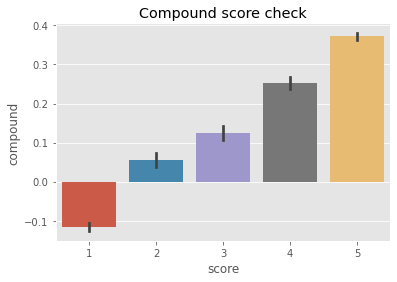

In [41]:
# checking whether vader is working fine or not
ax = sns.barplot(data = vaders, x ='score',y = 'compound')
ax.set_title('Compound score check')
plt.show()

#### we can see from this graph that the compound for score '1' is in negative which is a good thing and compund for score '5' is in a positive sense. comparitively the score 1 is the worst and 5 being the best

#### compound score will range from +1 to -1
#### -1: the most negative comment
#### +1: the most positive comment

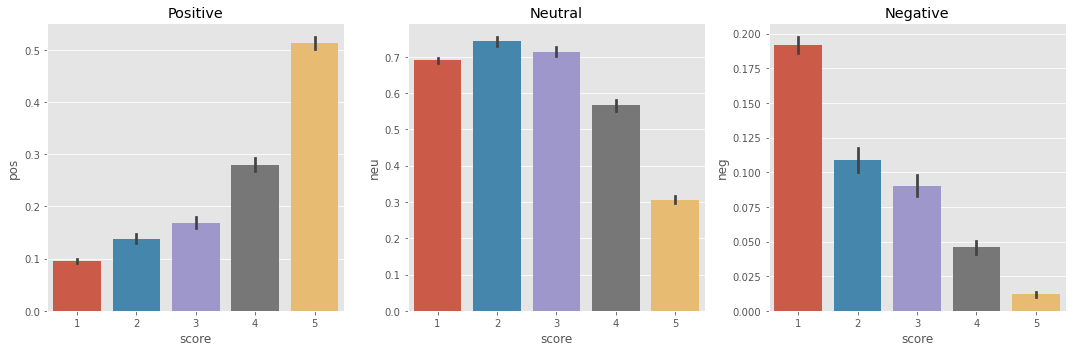

In [42]:
fig, axs = plt.subplots(1,3,figsize = (15,5))
sns.barplot(data=vaders, x='score',y='pos', ax = axs[0])
sns.barplot(data=vaders, x='score',y='neu', ax = axs[1])
sns.barplot(data=vaders, x='score',y='neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#### From the above graph we can see that the positive score are increasing as the score value increases
#### The negative scores are decreasing as the score value increases

In [43]:
vaders['appId'].value_counts()

com.tatamotors.pvcvp                   6830
com.tatamotors.evcvp                   4418
com.hyundai.india.bluelink.prd         2762
com.saicmotor.iov.india                1796
com.msil.suzukiconnect_generation_2    1324
com.mahindra.adrenox                    682
Name: appId, dtype: int64

In [44]:
tata_pv = vaders.loc[vaders['appId']=='com.tatamotors.pvcvp']
tata_ev = vaders.loc[vaders['appId']=='com.tatamotors.evcvp']
hyundai = vaders.loc[vaders['appId']=='com.hyundai.india.bluelink.prd']
saic_motor = vaders.loc[vaders['appId']=='com.saicmotor.iov.india']
suzuki_connect = vaders.loc[vaders['appId']=='com.msil.suzukiconnect_generation_2']
mahindra = vaders.loc[vaders['appId']=='com.mahindra.adrenox']

In [45]:
tata_pv.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'reviewId', 'userName',
       'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId', 'language'],
      dtype='object')

In [46]:
ntata_pv = tata_pv.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
ntata_ev = tata_ev.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
nhyundai = hyundai.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
nsaic = saic_motor.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
nsuzuki = suzuki_connect.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
nmahindra = mahindra.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)

## Looking at each companies sentiment analysis

### Creating a word map and plotting top 10 words

In [47]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [48]:
def top_keywords(corpus):
    c=Counter(' '.join(corpus).split()).most_common(10)
    word=[i for i,j in c]
    count=[j for i,j in c]
    return word,count
    
def wordmaps(df):
    word_vehicle = " ".join(df)
    stop_w = set(STOPWORDS)
    info = word_vehicle
    word_cloud = WordCloud(collocations=False, stopwords=stop_w).generate(info)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()














#### Tata Pv

The average scores of negative, neutral, positive
neg    0.112512
neu    0.557556
pos    0.253499
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\18146754.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ntata_pv.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\18146754.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(ntata_pv.mean())


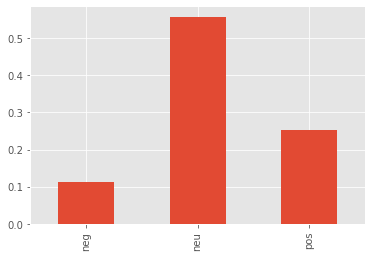

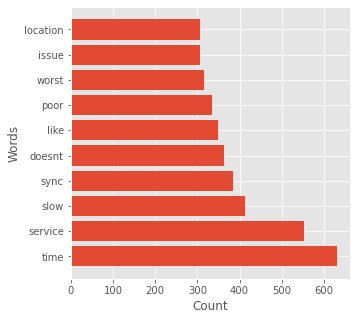

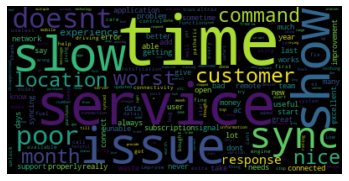

In [49]:
print("The average scores of negative, neutral, positive")
ntata_pv.mean().plot.bar()
print(ntata_pv.mean())


# top 10 repeated words
word,count=top_keywords(tata_pv.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(tata_pv['content'])

#### Tata Ev

The average scores of negative, neutral, positive
neg    0.081134
neu    0.560725
pos    0.272133
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2693242807.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ntata_ev.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2693242807.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(ntata_ev.mean())


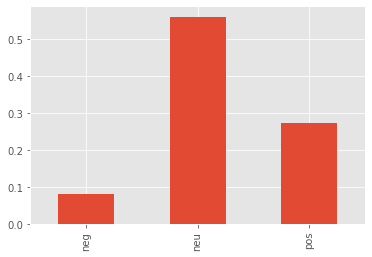

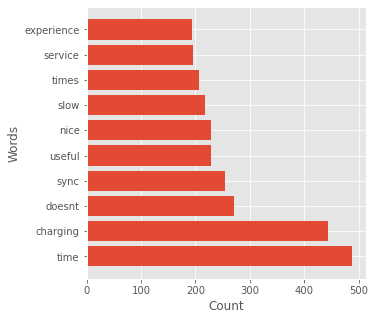

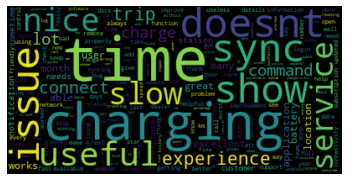

In [50]:
#### Tata Ev
print("The average scores of negative, neutral, positive")
ntata_ev.mean().plot.bar()
print(ntata_ev.mean())

# top 10 repeated words
word,count=top_keywords(tata_ev.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(tata_ev['content'])

#### Hyundai



The average scores of negative, neutral, positive
neg    0.127705
neu    0.622546
pos    0.195440
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\3972095056.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nhyundai.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\3972095056.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(nhyundai.mean())


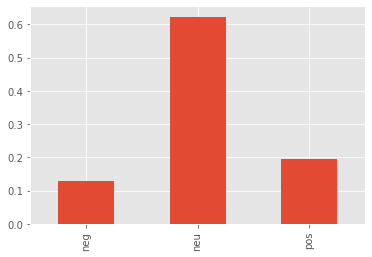

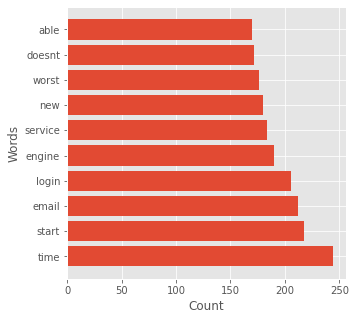

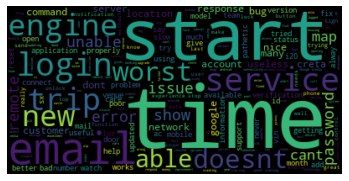

In [51]:
print("The average scores of negative, neutral, positive")
nhyundai.mean().plot.bar()
print(nhyundai.mean())

# top 10 repeated words
word,count=top_keywords(hyundai.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(hyundai['content'])

#### Saic motor

The average scores of negative, neutral, positive
neg    0.080393
neu    0.536518
pos    0.290658
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\1285134162.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nsaic.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\1285134162.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(nsaic.mean())


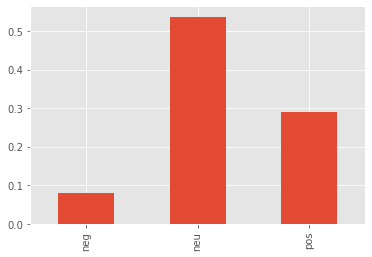

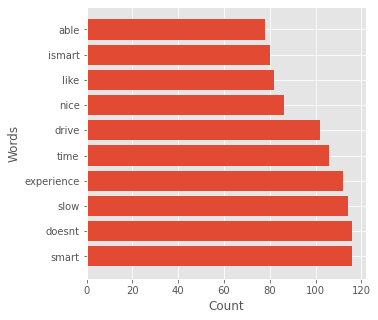

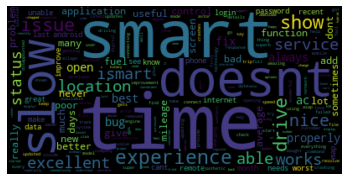

In [52]:
print("The average scores of negative, neutral, positive")
nsaic.mean().plot.bar()
print(nsaic.mean())

# top 10 repeated words
word,count=top_keywords(saic_motor.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(saic_motor['content'])

#### Suzuki connect

The average scores of negative, neutral, positive
neg    0.121719
neu    0.604556
pos    0.219347
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2939332315.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nsuzuki.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\2939332315.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(nsuzuki.mean())


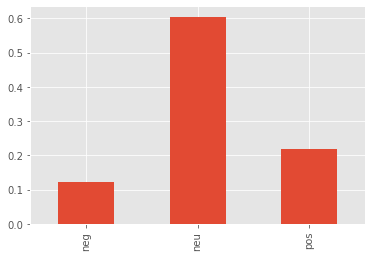

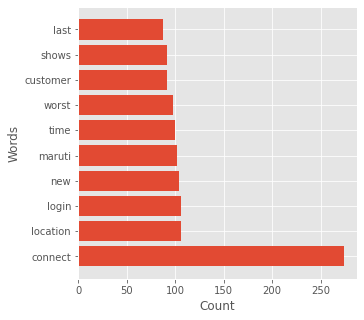

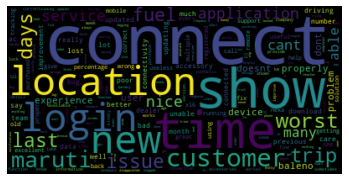

In [53]:
print("The average scores of negative, neutral, positive")
nsuzuki.mean().plot.bar()
print(nsuzuki.mean())

# top 10 repeated words
word,count=top_keywords(suzuki_connect.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(suzuki_connect['content'])

#### mahindra

The average scores of negative, neutral, positive
neg    0.077109
neu    0.653850
pos    0.222111
dtype: float64


C:\Users\34491\AppData\Local\Temp\ipykernel_8544\985870299.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nmahindra.mean().plot.bar()
C:\Users\34491\AppData\Local\Temp\ipykernel_8544\985870299.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(nmahindra.mean())


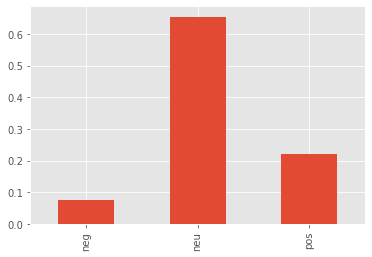

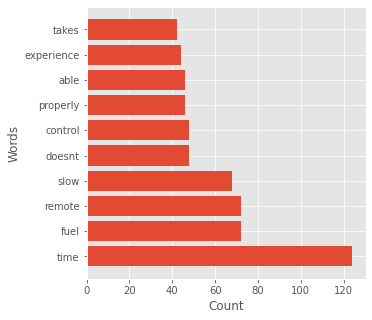

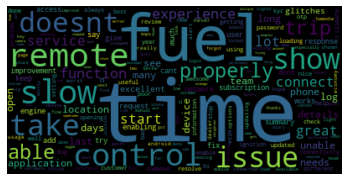

In [54]:
print("The average scores of negative, neutral, positive")
nmahindra.mean().plot.bar()
print(nmahindra.mean())

# top 10 repeated words
word,count=top_keywords(mahindra.content.values)
plt.figure(figsize = (5, 5))

# creating the bar plot
plt.barh(word, count)
plt.ylabel('Words')
plt.xlabel('Count')
plt.show()

# wordcloud
wordmaps(mahindra['content'])

### Comparision of all apps

In [55]:
vadres_all = vaders.drop(columns=['Id', 'reviewId', 'userName','userImage', 'content', 'score', 'thumbsUpCount','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder', 'language','compound'],axis =1)
vadres_all.head()

,neg,neu,pos,appId
0,0.000,0.931,0.069,com.tatamotors.evcvp
1,0.192,0.690,0.118,com.tatamotors.evcvp
2,0.146,0.751,0.103,com.tatamotors.evcvp
3,0.160,0.840,0.000,com.tatamotors.evcvp
4,0.046,0.886,0.068,com.tatamotors.evcvp


Text(0.5, 1.0, 'Comparision of different applications based on sentiment')

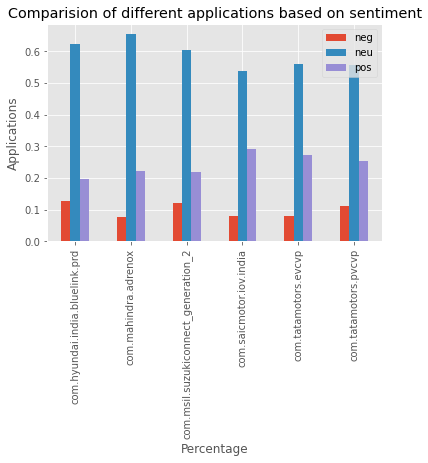

In [56]:
vadres_all.groupby('appId').mean().plot.bar()
plt.xlabel('Percentage')
plt.ylabel('Applications')
plt.title('Comparision of different applications based on sentiment')

# ---------------------------------------------------------------------------------------------

## Task 2: Getting to know what users are talking about, using Topic Modelling(gensim lda)

#### Topic Modelling: is an unsupervised technique where we have a set of docs describing certain things and we want to find what are the topics discussed in this set of docs

#### getting to know what people are talking about for tata pv

In [57]:
from nltk.corpus import stopwords

In [58]:
#spacy
import spacy

In [59]:
import glob

#gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#vis
import pyLDAvis
import pyLDAvis.gensim_models

import re
import string
import os
import pickle


In [60]:
#storing the contents of applications by grouping appId

tata_pv = vaders.loc[vaders['appId']=='com.tatamotors.pvcvp']
tata_ev = vaders.loc[vaders['appId']=='com.tatamotors.evcvp']
hyundai = vaders.loc[vaders['appId']=='com.hyundai.india.bluelink.prd']
saic_motor = vaders.loc[vaders['appId']=='com.saicmotor.iov.india']
suzuki_connect = vaders.loc[vaders['appId']=='com.msil.suzukiconnect_generation_2']
mahindra = vaders.loc[vaders['appId']=='com.mahindra.adrenox']

In [61]:
mahindra

,Id,neg,neu,pos,compound,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,language
15806,15806,0.115,0.827,0.058,-0.3187,974845fa-68f1-408b-813e-e6fad8c37ad8,Vivek Srivastava,https://play-lh.googleusercontent.com/a-/AD5-W...,sure planning charge subscription fee poorly d...,1,14,1.0.11,2022-11-27 11:39:16,"Hi Vivek, we are here to assist you. Please sh...",2022-11-27 19:49:08,most_relevant,com.mahindra.adrenox,unknown
15807,15807,0.000,0.758,0.242,0.7906,80fa13e5-1737-4e97-998d-e23ccc035b80,Nikhil John Johney,https://play-lh.googleusercontent.com/a/AEdFTp...,year free subscription almost 5 months applica...,1,0,1.0.11,2022-12-13 04:21:29,"Hi Nikhil, allow us to address your concern. P...",2022-12-14 17:57:11,most_relevant,com.mahindra.adrenox,unknown
15808,15808,0.071,0.863,0.066,0.1969,4eeb78b8-6996-48da-8fa6-bed95a6c71e4,T M,https://play-lh.googleusercontent.com/a-/AD5-W...,doesnt properly year sleeping along sales serv...,1,1,1.0.11,2022-11-28 07:48:10,"Hi Tanuj, allow us to address your concern. Pl...",2021-12-22 18:12:59,most_relevant,com.mahindra.adrenox,unknown
15809,15809,0.156,0.844,0.000,-0.5423,4d8ecf8f-a13c-4fcd-b55c-073b6c184f1a,rajendra ojha,https://play-lh.googleusercontent.com/a-/AD5-W...,properly hangsturns blank android auto audio q...,1,2,1.0.11,2022-11-15 14:38:35,"Hi Rajendra, allow us to address your concern....",2022-11-16 18:11:56,most_relevant,com.mahindra.adrenox,unknown
15810,15810,0.000,1.000,0.000,0.0000,e20026a0-4da2-4603-a876-751650895630,Praveen Mali,https://play-lh.googleusercontent.com/a-/AD5-W...,scorpio n z8l assigned user hence log possible...,1,0,1.0.11,2022-12-25 00:58:33,"Hi Praveen, allow us to address your concern. ...",2022-12-25 18:36:46,most_relevant,com.mahindra.adrenox,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16483,16483,0.000,1.000,0.000,0.0000,dbb8774e-8ea4-4548-a947-c9e40086c0af,Aakash Kumar singh,https://play-lh.googleusercontent.com/a-/AD5-W...,waiting 700 experience performance,5,9,0.0.3,2021-10-07 10:07:21,NaN,NaN,newest,com.mahindra.adrenox,unknown
16484,16484,0.000,0.000,0.000,0.0000,5a8ff65c-a10e-4b1a-af43-e77d5aabb1bc,Rahul Keshri,https://play-lh.googleusercontent.com/a-/AD5-W...,,5,4,0.0.3,2021-10-01 20:48:24,NaN,NaN,newest,com.mahindra.adrenox,unknown
16485,16485,0.000,0.417,0.583,0.6369,29795ec2-ba72-4f02-977d-71e788f43f3c,Narendar singh,https://play-lh.googleusercontent.com/a-/AD5-W...,going love gets released,5,5,NaN,2021-09-28 19:45:22,NaN,NaN,newest,com.mahindra.adrenox,unknown
16486,16486,0.000,0.580,0.420,0.4404,bd9092bd-6f9c-47dd-bbec-3298b3b2aba3,Clash Of Clans Abdul Hero,https://play-lh.googleusercontent.com/a/AEdFTp...,personally think gonna better companies,5,6,0.0.3,2021-09-28 04:48:45,NaN,NaN,newest,com.mahindra.adrenox,unknown


In [62]:
tata_pv_text = " ".join(tata_pv['content'])
tata_ev_text = " ".join(tata_ev['content'])
hyundai_text =" ".join(hyundai['content'])
saic_text = " ".join(saic_motor['content'])
suzuki_connect_text = " ".join(suzuki_connect['content'])
mahindra_text = " ".join(mahindra['content'])

In [63]:
#converting sentence to words
def sent_to_words (sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data = tata_pv.content.values.tolist()
tata_pv_words = list(sent_to_words(data))# converting them to list


In [64]:
print(tata_pv_words[:1])

[['edit', 'nov', 'doesnt', 'give', 'notifications', 'phone', 'leaves', 'geofence', 'stupid', 'keeps', 'notifications', 'inside', 'utterly', 'useless', 'careless', 'design', 'doesnt', 'switch', 'lights', 'middle', 'icon', 'turned', 'look', 'sometimes', 'takes', 'much', 'time', 'make', 'worth', 'money', 'ones', 'manufacturers', 'better']]


In [65]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tata_pv_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tata_pv_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram
print(trigram_mod[bigram_mod[tata_pv_words[0]]])

['edit', 'nov', 'doesnt', 'give', 'notifications', 'phone', 'leaves', 'geofence', 'stupid', 'keeps', 'notifications', 'inside', 'utterly', 'useless', 'careless', 'design', 'doesnt', 'switch', 'lights', 'middle', 'icon', 'turned', 'look', 'sometimes', 'takes', 'much', 'time', 'make', 'worth', 'money', 'ones', 'manufacturers', 'better']


In [66]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [67]:
# Form Bigrams
data_words_bigrams = make_bigrams(tata_pv_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['give', 'notification', 'phone', 'leave', 'geofence', 'stupid', 'keep', 'notification', 'utterly', 'useless', 'careless', 'design', 'switch', 'light', 'middle', 'icon', 'turn', 'look', 'sometimes', 'take', 'much', 'time', 'make', 'worth', 'money', 'one', 'manufacturer', 'well']]


In [68]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1)]]


In [69]:
id2word[0]

'careless'

In [70]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]


[[('careless', 1),
  ('design', 1),
  ('geofence', 1),
  ('give', 1),
  ('icon', 1),
  ('keep', 1),
  ('leave', 1),
  ('light', 1),
  ('look', 1),
  ('make', 1),
  ('manufacturer', 1),
  ('middle', 1),
  ('money', 1),
  ('much', 1),
  ('notification', 2),
  ('one', 1),
  ('phone', 1),
  ('sometimes', 1),
  ('stupid', 1),
  ('switch', 1),
  ('take', 1),
  ('time', 1),
  ('turn', 1),
  ('useless', 1),
  ('utterly', 1),
  ('well', 1),
  ('worth', 1)]]

In [71]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)

In [72]:
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]


[(0,
  '0.061*"sync" + 0.035*"connect" + 0.032*"show" + 0.025*"always" + '
  '0.022*"able" + 0.022*"signal" + 0.018*"low" + 0.016*"datum" + '
  '0.016*"location" + 0.013*"day"'),
 (1,
  '0.054*"nice" + 0.041*"time" + 0.032*"issue" + 0.022*"command" + '
  '0.021*"network" + 0.021*"take" + 0.020*"show" + 0.019*"poor" + 0.018*"get" '
  '+ 0.017*"well"'),
 (2,
  '0.050*"great" + 0.021*"waste" + 0.020*"money" + 0.016*"easy" + 0.013*"show" '
  '+ 0.013*"require" + 0.012*"subscription" + 0.011*"speed" + '
  '0.011*"technology" + 0.010*"charge"'),
 (3,
  '0.055*"lot" + 0.050*"improvement" + 0.048*"need" + 0.047*"slow" + '
  '0.037*"improve" + 0.030*"time" + 0.028*"response" + 0.024*"helpful" + '
  '0.015*"little" + 0.013*"superb"'),
 (4,
  '0.061*"service" + 0.047*"bad" + 0.038*"experience" + 0.030*"customer" + '
  '0.022*"issue" + 0.017*"month" + 0.016*"support" + 0.015*"care" + '
  '0.015*"sync" + 0.014*"problem"'),
 (5,
  '0.043*"add" + 0.026*"application" + 0.021*"good" + 0.020*"engine" + 

How to interpret this?

It means the top 10 keywords that contribute to this topic are: '0.110*"show" + 0.103*"sync" + 0.080*"location"’.. and so on and the weight.
The weights reflect how important a keyword is to that topic

In [73]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.926391386319868

Coherence Score:  0.4200964768139501


#### lets see if we can increase the coherence score
#### by running the lda models multiple times and by plotting the graph we can get to know

In [74]:
from gensim.models import LdaMulticore 

In [75]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

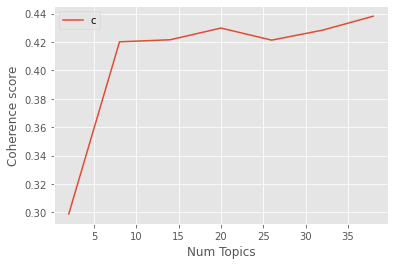

In [76]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### From the above graph we can see that the coherence score keeps increasing as the number of topics increases, if we increase the num of topics it would again create a problem, so limiting ourselves to a num topics of 10 and going ahead

In [77]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.204624 -0.101700       1        1  14.360708
1      0.046944 -0.171352       2        1  14.300437
8     -0.143291  0.008072       3        1  14.253250
0     -0.060332 -0.108071       4        1  11.337967
6      0.210568  0.108124       5        1   8.378130
3      0.192145 -0.135028       6        1   8.299492
5      0.113244  0.034890       7        1   7.761260
7     -0.057839  0.150948       8        1   7.729640
2     -0.045818  0.144197       9        1   7.644279
9     -0.050997  0.069920      10        1   5.934837, topic_info=           Term        Freq       Total Category  logprob  loglift
156      useful  300.000000  300.000000  Default  30.0000  30.0000
75      service  562.000000  562.000000  Default  29.0000  29.0000
1685       nice  436.000000  436.000000  Default  28.0000  28.0000
1559  excellent  274.000000  274.000000  Default  27.0000  27.0000
78         sync  573.000000  573.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
382       model   18.524711  118.967453  Topic10  -5.0163   0.9646
443        feel   16.323958   62.168478  Topic10  -5.1428   1.4871
276        year   18.332029  191.428814  Topic10  -5.0268   0.4785
57          use   16.760816  171.914750  Topic10  -5.1164   0.4964
21         time   16.238246  753.849044  Topic10  -5.1480  -1.0135

[666 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2114      7  0.891864   aap
157       1  0.221496  able
157       3  0.035439  able
157       4  0.531592  able
157       6  0.004430  able
...     ...       ...   ...
343       3  0.323623   yet
343       4  0.391044   yet
343       6  0.067421   yet
343       8  0.053937   yet
343      10  0.080906   yet

[1380 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 9, 1, 7, 4, 6, 8, 3, 10])

### The above interactive chart shows what are people talking about based on topics keyword for TATA PV Application

### Users talking about Tata Ev

In [78]:
data = tata_ev.content.values.tolist()
tata_ev_words = list(sent_to_words(data))# converting them to list
print(tata_pv_words[:1])

[['edit', 'nov', 'doesnt', 'give', 'notifications', 'phone', 'leaves', 'geofence', 'stupid', 'keeps', 'notifications', 'inside', 'utterly', 'useless', 'careless', 'design', 'doesnt', 'switch', 'lights', 'middle', 'icon', 'turned', 'look', 'sometimes', 'takes', 'much', 'time', 'make', 'worth', 'money', 'ones', 'manufacturers', 'better']]


In [79]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tata_ev_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tata_ev_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Form Bigrams
data_words_bigrams = make_bigrams(tata_ev_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.021*"available" + 0.020*"time" + 0.019*"keep" + 0.017*"thank" + '
  '0.017*"battery" + 0.017*"drive" + 0.016*"fine" + 0.015*"charge" + '
  '0.013*"network" + 0.013*"informative"'),
 (1,
  '0.071*"useful" + 0.045*"helpful" + 0.030*"good" + 0.027*"improve" + '
  '0.020*"lag" + 0.015*"station" + 0.014*"charge" + 0.014*"show" + '
  '0.012*"awesome" + 0.012*"well"'),
 (2,
  '0.035*"experience" + 0.030*"bad" + 0.025*"day" + 0.023*"get" + '
  '0.023*"month" + 0.022*"connect" + 0.022*"customer" + 0.020*"service" + '
  '0.018*"last" + 0.018*"able"'),
 (3,
  '0.034*"sync" + 0.025*"service" + 0.024*"add" + 0.018*"work" + 0.017*"time" '
  '+ 0.015*"poor" + 0.015*"stop" + 0.014*"alert" + 0.013*"date" + '
  '0.012*"issue"'),
 (4,
  '0.100*"charge" + 0.038*"trip" + 0.022*"station" + 0.022*"well" + '
  '0.018*"show" + 0.016*"easy" + 0.011*"information" + 0.011*"control" + '
  '0.010*"time" + 0.010*"status"'),
 (5,
  '0.134*"nice" + 0.070*"application" + 0.048*"need" + 0.040*"improvement" + '

In [80]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.944255297726104

Coherence Score:  0.3778987850365005


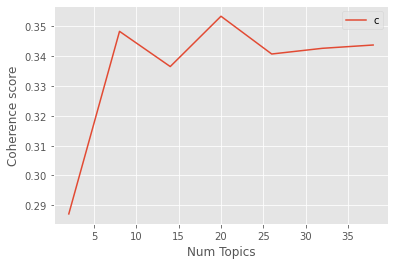

In [81]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [82]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.118688 -0.047543       1        1  13.187056
2     -0.183631  0.021082       2        1  11.790656
3     -0.139893 -0.032989       3        1  11.776460
8     -0.112332 -0.116074       4        1  11.240519
0      0.075763  0.101937       5        1  10.179202
9     -0.109310 -0.065442       6        1   9.632283
6      0.135010 -0.094570       7        1   9.334457
1      0.191494 -0.099089       8        1   8.022347
7     -0.011943  0.068632       9        1   7.957364
5      0.036152  0.264057      10        1   6.879658, topic_info=             Term        Freq       Total Category  logprob  loglift
1615         nice  269.000000  269.000000  Default  30.0000  30.0000
1274    excellent  223.000000  223.000000  Default  29.0000  29.0000
86         charge  568.000000  568.000000  Default  28.0000  28.0000
293        useful  249.000000  249.000000  Default  27.0000  27.0000
62    application  159.000000  159.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
91          drive   13.700698  129.761879  Topic10  -4.9831   0.4283
257       provide   11.778553   70.087568  Topic10  -5.1342   0.8931
86         charge   14.990821  568.331823  Topic10  -4.8931  -0.9587
5        function   11.944193   80.805039  Topic10  -5.1203   0.7648
160          time   14.047112  588.659554  Topic10  -4.9581  -1.0588

[653 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
2079      8  0.872613   aap
267       1  0.052911  able
267       2  0.461082  able
267       3  0.113381  able
267       6  0.166292  able
...     ...       ...   ...
108       8  0.050276   yet
794       2  0.886904  zoom
2107      3  0.753346    गड
2114      3  0.753346    फर
2078      3  0.930266    लन

[1270 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 4, 9, 1, 10, 7, 2, 8, 6])

### Users talking about Hyundai

In [83]:
data = hyundai.content.values.tolist()
hyundai_words = list(sent_to_words(data))# converting them to list
print(hyundai_words[:1])

[['multiple', 'attempts', 'simply', 'isnt', 'verification', 'mail', 'received', 'account', 'creation', 'wont', 'happen', 'becomes', 'extremely', 'useless']]


In [84]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(hyundai_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[hyundai_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Form Bigrams
data_words_bigrams = make_bigrams(hyundai_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.050*"start" + 0.037*"engine" + 0.030*"password" + 0.026*"reset" + '
  '0.023*"try" + 0.020*"log" + 0.018*"email" + 0.014*"login" + 0.014*"remote" '
  '+ 0.013*"give"'),
 (1,
  '0.036*"time" + 0.025*"login" + 0.025*"error" + 0.024*"enter" + 0.023*"vin" '
  '+ 0.022*"say" + 0.022*"application" + 0.021*"give" + 0.020*"add" + '
  '0.020*"open"'),
 (2,
  '0.037*"lock" + 0.028*"get" + 0.024*"door" + 0.020*"service" + '
  '0.016*"unlock" + 0.016*"time" + 0.016*"notification" + 0.015*"good" + '
  '0.014*"care" + 0.013*"try"'),
 (3,
  '0.050*"trip" + 0.027*"useful" + 0.022*"update" + 0.022*"bug" + 0.021*"map" '
  '+ 0.021*"excellent" + 0.020*"problem" + 0.018*"crash" + 0.013*"lot" + '
  '0.013*"time"'),
 (4,
  '0.075*"email" + 0.046*"verification" + 0.037*"account" + 0.037*"bad" + '
  '0.028*"send" + 0.027*"create" + 0.026*"able" + 0.020*"unable" + '
  '0.016*"mail" + 0.016*"get"'),
 (5,
  '0.089*"nice" + 0.031*"map" + 0.023*"slow" + 0.020*"useless" + 0.019*"poor" '
  '+ 0.018*"bad" +

In [85]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.732489972504474

Coherence Score:  0.373761446662957


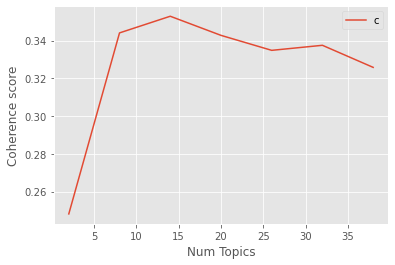

In [86]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [87]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.011331 -0.048945       1        1  12.684985
3      0.157851 -0.000955       2        1  11.713745
7      0.019085  0.071030       3        1  11.655028
0     -0.146669  0.029381       4        1  11.421550
9     -0.075022  0.099385       5        1  10.857434
1     -0.043455 -0.163115       6        1   9.442842
2      0.060433 -0.041295       7        1   9.214419
4     -0.204448  0.014998       8        1   8.824949
8      0.133078  0.182031       9        1   7.377407
5      0.110477 -0.142515      10        1   6.807641, topic_info=             Term        Freq       Total Category  logprob  loglift
680          nice  128.000000  128.000000  Default  30.0000  30.0000
92          email  187.000000  187.000000  Default  29.0000  29.0000
66          start  291.000000  291.000000  Default  28.0000  28.0000
11   verification   86.000000   86.000000  Default  27.0000  27.0000
153          trip  180.000000  180.000000  Default  26.0000  26.0000
..            ...         ...         ...      ...      ...      ...
18          drive    7.053428   23.267310  Topic10  -5.3158   1.4936
66          start    9.203288  291.742126  Topic10  -5.0498  -0.7692
147         never    7.589425   52.590445  Topic10  -5.2426   0.7513
253         model    7.398201   86.286232  Topic10  -5.2681   0.2307
95           give    7.446138  133.604996  Topic10  -5.2616  -0.2001

[662 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1855     10  0.882543    aap
68        1  0.033940   able
68        2  0.020364   able
68        3  0.040728   able
68        4  0.156124   able
...     ...       ...    ...
242       4  0.548576  wrong
242       6  0.253189  wrong
242       9  0.084396  wrong
867       1  0.938956  wrost
1407      4  0.803179     नह

[1301 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 8, 1, 10, 2, 3, 5, 9, 6])

### Users talking about Saic Motors

In [88]:
data = saic_motor.content.values.tolist()
saic_words = list(sent_to_words(data))# converting them to list
print(saic_words[:1])

[['first', 'try', 'develop', 'type', 'unfortunately', 'job', 'meant', 'example', 'open', 'functionality', 'times', 'rarely', 'times', 'crashes', 'home', 'page', 'show', 'status', 'vehicles', 'opening', 'function', 'button', 'show', 'status', 'start', 'inside', 'starting', 'little', 'better']]


In [89]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(saic_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[saic_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Form Bigrams
data_words_bigrams = make_bigrams(saic_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"issue" + 0.022*"open" + 0.021*"crash" + 0.020*"able" + 0.019*"fix" + '
  '0.016*"drive" + 0.015*"ismart" + 0.015*"smart" + 0.014*"location" + '
  '0.014*"recent"'),
 (1,
  '0.039*"bug" + 0.028*"wonderful" + 0.023*"function" + 0.018*"cool" + '
  '0.018*"wait" + 0.014*"helpful" + 0.013*"update" + 0.012*"issue" + '
  '0.011*"wrong" + 0.011*"properly"'),
 (2,
  '0.023*"show" + 0.021*"get" + 0.020*"poor" + 0.018*"bind" + 0.016*"phone" + '
  '0.016*"log" + 0.016*"check" + 0.015*"smart" + 0.014*"control" + '
  '0.013*"application"'),
 (3,
  '0.042*"awesome" + 0.015*"average" + 0.014*"get" + 0.013*"possible" + '
  '0.012*"use" + 0.011*"easy" + 0.011*"fast" + 0.011*"show" + 0.010*"m" + '
  '0.010*"take"'),
 (4,
  '0.025*"bad" + 0.024*"really" + 0.022*"technology" + 0.018*"much" + '
  '0.014*"time" + 0.014*"customer" + 0.014*"add" + 0.014*"give" + 0.012*"ask" '
  '+ 0.012*"drive"'),
 (5,
  '0.033*"slow" + 0.025*"diesel" + 0.020*"automatic" + 0.020*"hybrid" + '
  '0.017*"time" + 0.

In [90]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.80355661582447

Coherence Score:  0.39585459613870266


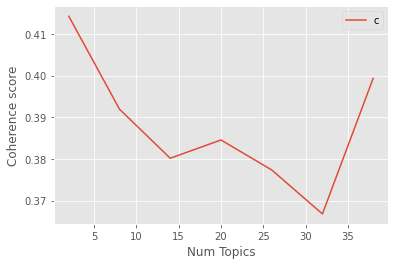

In [91]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [92]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.005692  0.103023       1        1  14.651370
3      0.035567 -0.078532       2        1  11.023836
7      0.096314  0.019493       3        1  10.705917
8      0.007384  0.012934       4        1  10.695753
4      0.009332 -0.079474       5        1  10.448278
2      0.032799  0.052181       6        1   9.719653
9      0.039291 -0.109309       7        1   9.483683
5      0.013922 -0.123131       8        1   8.443344
6     -0.307150  0.022152       9        1   7.793821
1      0.066849  0.180664      10        1   7.034345, topic_info=            Term        Freq       Total Category  logprob  loglift
1140        nice  100.000000  100.000000  Default  30.0000  30.0000
598    excellent   86.000000   86.000000  Default  29.0000  29.0000
1202        good   65.000000   65.000000  Default  28.0000  28.0000
28    experience  112.000000  112.000000  Default  27.0000  27.0000
890      awesome   53.000000   53.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
110         slow    7.215465   86.649906  Topic10  -4.7059   0.1687
23          well    6.765659   68.600509  Topic10  -4.7702   0.3379
37           fix    6.397715   64.875296  Topic10  -4.8261   0.3378
92          work    6.209097   68.149285  Topic10  -4.8561   0.2587
67         drive    5.964680  111.043957  Topic10  -4.8962  -0.2697

[644 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1365      5  0.887444    aa
496       1  0.218165   aap
496       4  0.763577   aap
93        1  0.479151  able
93        2  0.116158  able
...     ...       ...   ...
1414      1  0.684515   जसस
1415      1  0.684515   मकत
1416      1  0.684515  मजदर
1417      1  0.684515    मल
1418      1  0.684515   सकत

[1294 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 8, 9, 5, 3, 10, 6, 7, 2])

#### Users talking about Suzuki 

In [93]:
data = suzuki_connect.content.values.tolist()
suzuki_words = list(sent_to_words(data))# converting them to list
print(suzuki_words[:1])

[['gone', 'worse', 'previous', 'much', 'better', 'terms', 'functionality', 'display', 'trips', 'battery', 'voltage', 'fuel', 'qty', 'display', 'everything', 'near', 'accurate', 'new', 'looks', 'correct', 'odometer', 'reading', 'location', 'fuel', 'location', 'vehicleetc', 'nothing', 'displayed', 'accurately', 'became', 'useless', 'real', 'time', 'location', 'live', 'trip', 'kindly', 'revert', 'back', 'previous']]


In [94]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(suzuki_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[suzuki_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Form Bigrams
data_words_bigrams = make_bigrams(suzuki_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.032*"connect" + 0.025*"able" + 0.024*"user" + 0.020*"issue" + '
  '0.019*"login" + 0.016*"dealer" + 0.016*"customer" + 0.016*"really" + '
  '0.015*"time" + 0.015*"well"'),
 (1,
  '0.062*"nice" + 0.042*"device" + 0.024*"login" + 0.015*"fix" + '
  '0.013*"multiple" + 0.012*"user" + 0.011*"connect" + 0.011*"many" + '
  '0.009*"do" + 0.009*"service"'),
 (2,
  '0.039*"bad" + 0.030*"show" + 0.020*"connectivity" + 0.018*"experience" + '
  '0.017*"lose" + 0.013*"last" + 0.013*"use" + 0.012*"get" + 0.012*"proper" + '
  '0.011*"unable"'),
 (3,
  '0.043*"connect" + 0.030*"well" + 0.013*"battery_voltage" + 0.013*"old" + '
  '0.013*"much" + 0.011*"update" + 0.011*"interface" + 0.011*"download" + '
  '0.010*"percentage" + 0.010*"connectivity"'),
 (4,
  '0.021*"remote" + 0.016*"stop" + 0.015*"update" + 0.014*"time" + '
  '0.014*"experience" + 0.012*"ui" + 0.012*"add" + 0.012*"month" + '
  '0.012*"amazing" + 0.011*"give"'),
 (5,
  '0.030*"trip" + 0.022*"location" + 0.020*"time" + 0.020*"get"

In [95]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.5577670276480164

Coherence Score:  0.38053482563342517


In [96]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.116535 -0.019343       1        1  14.154739
5     -0.022780 -0.057970       2        1  13.607192
7     -0.044714 -0.049033       3        1  11.845992
2     -0.001631 -0.057206       4        1  11.103523
9      0.063625 -0.109314       5        1  11.021262
6     -0.032624 -0.036876       6        1   8.639935
1     -0.097725  0.183081       7        1   8.283846
4      0.029854  0.124811       8        1   7.699031
8      0.224637  0.062199       9        1   6.900792
3     -0.002107 -0.040348      10        1   6.743688, topic_info=           Term        Freq       Total Category  logprob  loglift
1119       nice   70.000000   70.000000  Default  30.0000  30.0000
178      device   47.000000   47.000000  Default  29.0000  29.0000
1154  excellent   39.000000   39.000000  Default  28.0000  28.0000
7          fuel   77.000000   77.000000  Default  27.0000  27.0000
210     connect  271.000000  271.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
47         show    5.662742  169.204300  Topic10  -4.8268  -0.7006
375    purchase    4.688293   56.897526  Topic10  -5.0156   0.2004
65         give    4.665122   58.970770  Topic10  -5.0205   0.1596
174         bad    4.862786  100.496477  Topic10  -4.9790  -0.3319
184     service    4.156299   54.355437  Topic10  -5.1360   0.1256

[695 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
169       1  0.696646  able
169       2  0.075313  able
169       4  0.018828  able
169       5  0.112970  able
169       6  0.056485  able
...     ...       ...   ...
1213     10  0.646916    जत
1214     10  0.646915  जनकर
1219      9  0.674241   टयर
1215     10  0.646915    मल
1216     10  0.646915    सर

[1330 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 8, 3, 10, 7, 2, 5, 9, 4])

### Users talking about Mahindra

In [97]:
data = mahindra.content.values.tolist()
mahindra_words = list(sent_to_words(data))# converting them to list
print(mahindra_words[:1])

[['sure', 'planning', 'charge', 'subscription', 'fee', 'poorly', 'designed', 'doesnt', 'times', 'doesnt', 'qualify', 'used', 'free', 'cost', 'start', 'confusing', 'either', 'doors', 'open', 'lights', 'checking', 'found', 'properly', 'shut', 'common', 'issues', 'controls', 'either', 'doesnt', 'takes', 'alot', 'time', 'load', 'least', 'time']]


In [98]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(mahindra_words, min_count=10, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[mahindra_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# Form Bigrams
data_words_bigrams = make_bigrams(mahindra_words)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=10,random_state=100,chunksize=100,passes=10)
# Print the Keyword in the 10 topics
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"excellent" + 0.024*"slow" + 0.022*"glitch" + 0.022*"service" + '
  '0.021*"connect" + 0.018*"awesome" + 0.014*"engine" + 0.013*"show" + '
  '0.013*"give" + 0.013*"function"'),
 (1,
  '0.053*"slow" + 0.038*"properly" + 0.027*"time" + 0.024*"experience" + '
  '0.022*"connect" + 0.014*"amazing" + 0.014*"well" + 0.014*"never" + '
  '0.011*"try" + 0.011*"say"'),
 (2,
  '0.022*"fuel" + 0.019*"show" + 0.018*"bad" + 0.018*"see" + 0.017*"detail" + '
  '0.016*"time" + 0.015*"ignition" + 0.013*"remote" + 0.012*"drive" + '
  '0.012*"economy"'),
 (3,
  '0.083*"time" + 0.044*"take" + 0.032*"connect" + 0.025*"remote" + '
  '0.022*"fuel" + 0.021*"function" + 0.018*"detail" + 0.018*"lot" + '
  '0.018*"slow" + 0.016*"long"'),
 (4,
  '0.034*"remote" + 0.034*"control" + 0.027*"start" + 0.022*"get" + '
  '0.021*"time" + 0.019*"log" + 0.017*"show" + 0.017*"fuel" + 0.016*"nice" + '
  '0.016*"experience"'),
 (5,
  '0.032*"able" + 0.025*"great" + 0.024*"get" + 0.023*"issue" + '
  '0.022*"applica

In [99]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.329153013629287

Coherence Score:  0.395355656041862


In [100]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

C:\Users\34491\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.043716 -0.111046       1        1  13.751926
4     -0.111362 -0.016487       2        1  11.740737
5     -0.005616  0.166543       3        1  10.917633
2     -0.132637  0.024093       4        1  10.612549
6     -0.059189  0.136454       5        1  10.579471
3     -0.038095 -0.142167       6        1  10.449711
8      0.197742  0.058433       7        1   9.224689
1      0.148543 -0.073330       8        1   8.915980
0      0.036080 -0.007548       9        1   6.973609
7      0.008252 -0.034946      10        1   6.833695, topic_info=            Term        Freq       Total Category  logprob  loglift
26          time  134.000000  134.000000  Default  30.0000  30.0000
113         slow   56.000000   56.000000  Default  29.0000  29.0000
682    excellent   20.000000   20.000000  Default  28.0000  28.0000
238      connect   41.000000   41.000000  Default  27.0000  27.0000
356      request   18.000000   18.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
316      improve    1.838908   16.402306  Topic10  -5.2845   0.4951
211     location    1.842547   27.208946  Topic10  -5.2825  -0.0091
25          take    1.855551   58.632972  Topic10  -5.2755  -0.7698
5        control    1.841242   53.110714  Topic10  -5.2832  -0.6786
29   application    1.840893   28.778631  Topic10  -5.2834  -0.0661

[657 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
287       1  0.048785       able
287       2  0.121963       able
287       3  0.439068       able
287       4  0.073178       able
287       5  0.170749       able
...     ...       ...        ...
43        5  0.239569       year
377       2  0.829667  yesterday
436       8  0.786597         चन
437       8  0.786596         नह
438       8  0.786596        सनग

[1037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 5, 6, 3, 7, 4, 9, 2, 1, 8])